In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


# 1. Problem Defintion  
* How can we use machine learning models to predict if the ads that are shown to users will be purchased or not!
 

# 2. Import Data 

In [2]:
df = pd.read_csv('../input/social-network-ads/Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [6]:
#check nulls 
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# 3-EDA

In [7]:
df['Purchased'].value_counts()


0    257
1    143
Name: Purchased, dtype: int64

<AxesSubplot:title={'center':'Count of purchased'}, xlabel='Purchased', ylabel='count'>

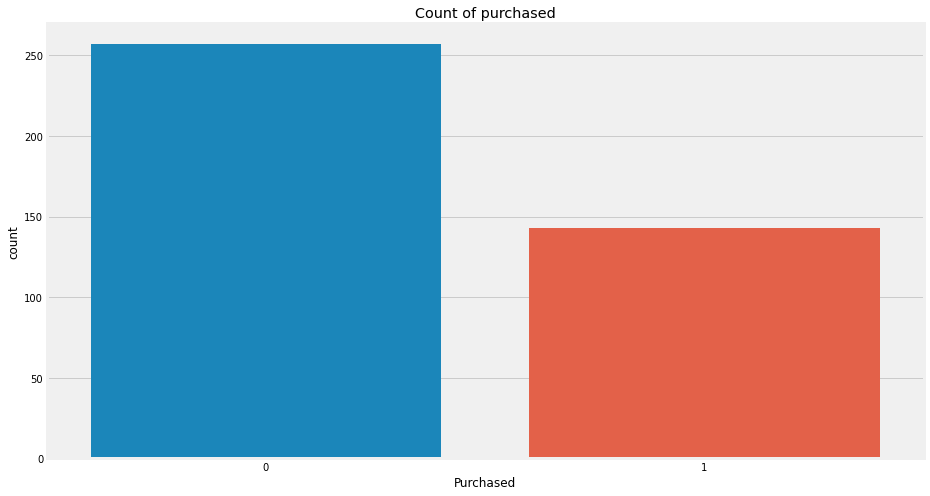

In [8]:
#Showin the count of Purchases 
plt.figure(figsize=(14,8))
plt.title('Count of purchased')
sns.countplot(data=df,x='Purchased')

> the data is a little in-balance 

<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age', ylabel='Count'>

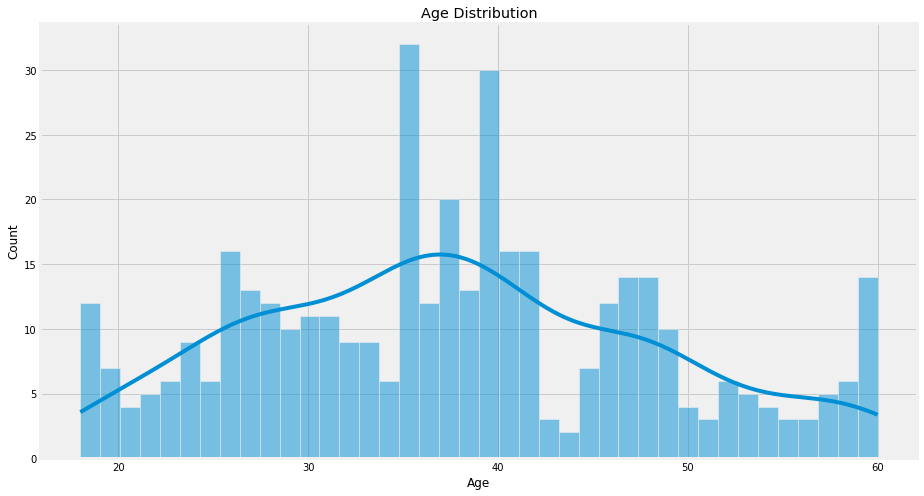

In [9]:
# plot the distribution of ages 
plt.figure(figsize=(14,8))
plt.title("Age Distribution")
sns.histplot(data=df,x=df['Age'],kde=True,bins=40)

> No skewness,Normal distribution and thats a good indicator for linear based models  

<AxesSubplot:title={'center':'Estimated Saleries Distribution '}, xlabel='EstimatedSalary', ylabel='Count'>

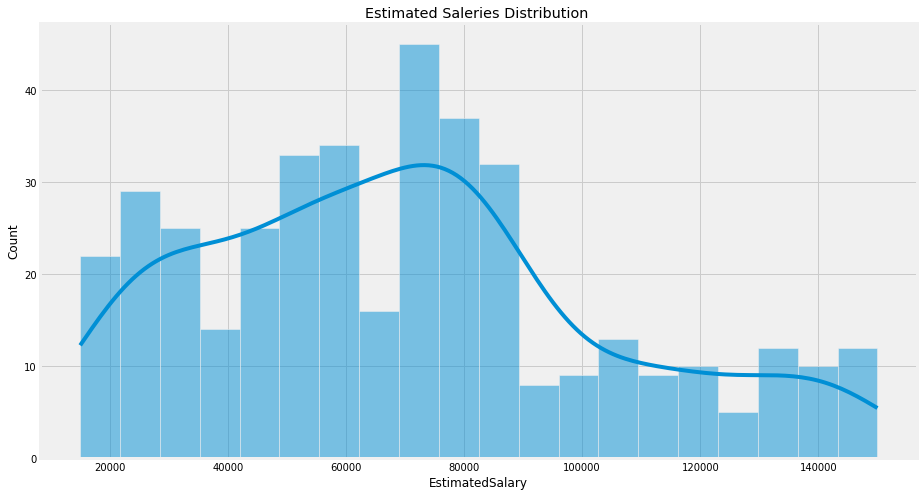

In [10]:
#Plot the distribution of estimated saleries 
plt.figure(figsize=(14,8))
plt.title('Estimated Saleries Distribution ')
sns.histplot(data=df,x=df['EstimatedSalary'],kde=True,bins=20)

In [11]:
print(df['EstimatedSalary'].mean())
print(df['EstimatedSalary'].median())
print(df['EstimatedSalary'].mode())

69742.5
70000.0
0    72000
dtype: int64


> 

<AxesSubplot:title={'center':'Estimated Salary vs Age vs Purchases'}, xlabel='Age', ylabel='EstimatedSalary'>

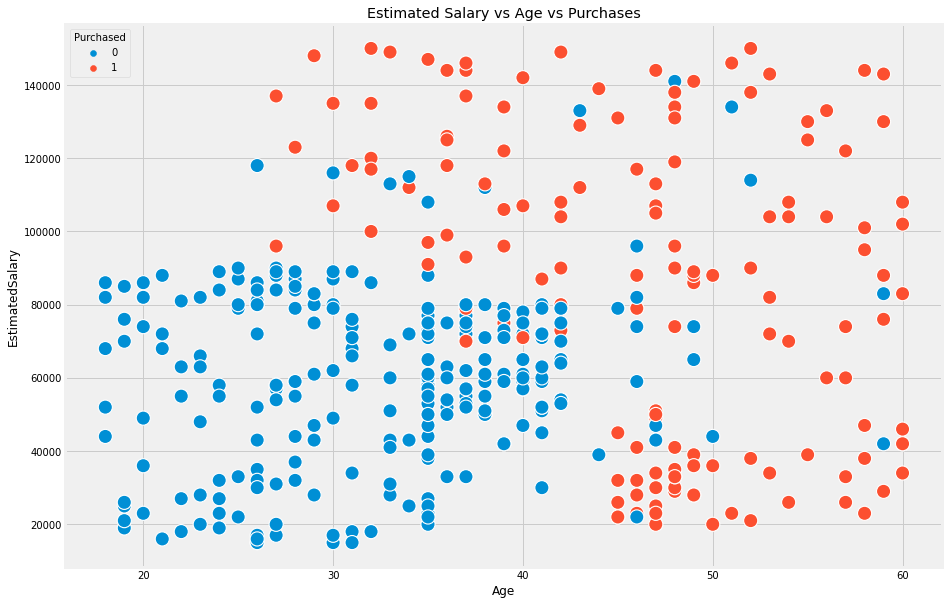

In [12]:
plt.figure(figsize=(14,10))
plt.title('Estimated Salary vs Age vs Purchases')
sns.scatterplot(data=df,x='Age',y='EstimatedSalary',hue='Purchased',s=200)

> from the chart, we observed that most of the people from **' 20s** to **' 30s** their estimated salaries range between **20000** and **90000** so they aren't purchasing the ads for many reasons maybe like they have kids and other priorities but the ones whose salaries ranges above **90000** they do purchase the ads, at the other hand the people above **'40s** to **'60s** most of them have purchased the ads regardless of their estimated salary.

<AxesSubplot:title={'center':'Heat map of Correlation'}>

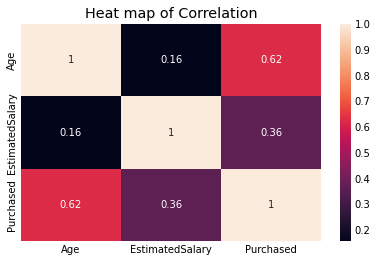

In [13]:
plt.title('Heat map of Correlation')
sns.heatmap(data=df.corr(), annot= True)

> positive correlation between purchased and age

# 4- Feature Engineering

In [14]:
X = df.drop('Purchased',axis=1)
y = df['Purchased']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [17]:
#Scaling 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5- Modeling 

In [18]:
def fit_and_score(models,X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name]  = model.score(X_test,y_test)
        
    model_scores = pd.DataFrame(model_scores,index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
    
    return model_scores

In [19]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'XGBClassifier': XGBClassifier(eval_metric='mlogloss'),
          'XGBRFClassifier': XGBRFClassifier(eval_metric='mlogloss')}

In [20]:
baseline_model_scores = fit_and_score(models,X_train, X_test, y_train, y_test)

In [21]:
baseline_model_scores

,Score
DecisionTreeClassifier,0.8375
LogisticRegression,0.8625
GradientBoostingClassifier,0.8625
RandomForestClassifier,0.8875
AdaBoostClassifier,0.8875
KNeighborsClassifier,0.9125
XGBClassifier,0.9125
SVC,0.9250
XGBRFClassifier,0.9250


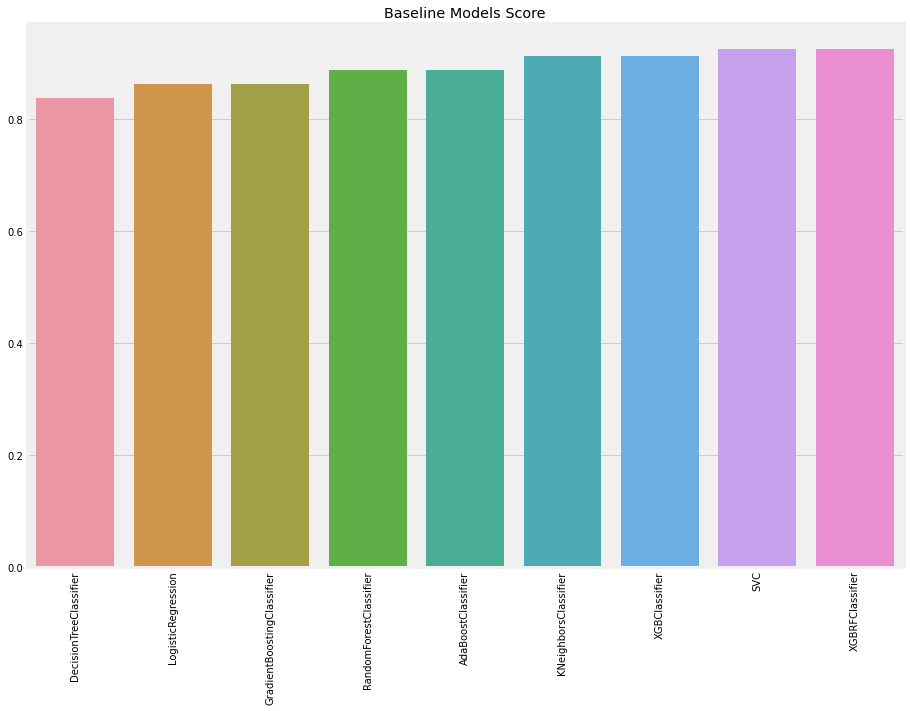

In [22]:
plt.figure(figsize=(14,10))
sns.barplot(data=baseline_model_scores.sort_values('Score').T)
plt.title('Baseline Models Score')
plt.xticks(rotation=90);

> we will choose the following model to have an in-depth look:
* KNeighborsClassifier 0.9125
* XGBClassifier 0.9125
* SVC	0.9250
* XGBRFClassifier	0.9250

# Hyperparameter Tuning unsing Random Search CV 

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from warnings import filterwarnings
filterwarnings('ignore')

In [24]:
def randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_rs_scores = {}
    model_rs_best_param = {}
    
    for name, model in models.items():
        rs_model = RandomizedSearchCV(model,
                                     param_distributions=params[name],
                                     cv=5,
                                     n_iter=20,
                                     verbose=1)
        rs_model.fit(X_train,y_train)
        model_rs_scores[name] = rs_model.score(X_test,y_test)
        model_rs_best_param[name] = rs_model.best_params_
        
    return model_rs_scores, model_rs_best_param

**Random Search Cv 1**

In [25]:
params = {'KNeighborsClassifier' : {'n_neighbors': np.arange(1,100,10)},
          
          
          'XGBClassifier': {'learning_rate': np.linspace(0,1,20),
                            'gamma': [0,2,4,10,20,50],
                            'max_depth': [2,3,6,10,20],
                            'lambda': [0,1],
                            'alpha' : [0,0.1,0.2,0.5,0.8,1],
                            },
          'XGBRFClassifier': {'learning_rate': np.linspace(0,1,20),
                              'max_depth': [2,3,6,10,20],
                              },
          'SVC' : {'C': [0.1,0.5,1, 10,100,500], 
                   'kernel':['linear', 'poly', 'rbf','sigmoid'],
                   'gamma':['scale','auto'],
                   'degree':[2,3,4,5,6,7]}
          }
models = {'KNeighborsClassifier': KNeighborsClassifier(),
         'XGBClassifier': XGBClassifier(eval_metric='mlogloss'),
         'XGBRFClassifier': XGBRFClassifier(eval_metric='mlogloss'),
         'SVC': SVC()
         }

In [26]:
model_rs_scores_1, model_rs_best_param_1 = randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [27]:
model_rs_scores_1

{'KNeighborsClassifier': 0.925,
 'XGBClassifier': 0.9125,
 'XGBRFClassifier': 0.9125,
 'SVC': 0.9375}

In [28]:
model_rs_best_param_1

{'KNeighborsClassifier': {'n_neighbors': 11},
 'XGBClassifier': {'max_depth': 2,
  'learning_rate': 0.631578947368421,
  'lambda': 0,
  'gamma': 20,
  'alpha': 0},
 'XGBRFClassifier': {'max_depth': 2, 'learning_rate': 0.47368421052631576},
 'SVC': {'kernel': 'rbf', 'gamma': 'scale', 'degree': 7, 'C': 0.5}}

**Random Search CV 2**

In [29]:
params = {'KNeighborsClassifier' : {'n_neighbors': np.arange(1,15)},
          'XGBClassifier': {'learning_rate': [0.631578947368421],
                            'gamma': [15,20,25],
                            'max_depth': [2],
                            'lambda': [0,1],
                            'alpha' : [0],
                            },
          'XGBRFClassifier': {'learning_rate': [0.47368421052631576],
                              'max_depth': [2],
                              },
          'SVC' : {'C': [0.3,0.4,0.5,0.6,0.7], 
                   'kernel':['rbf'],
                   'gamma':['scale'],
                   'degree':[7,8,9,10,15,20]}
          }
models = {'KNeighborsClassifier': KNeighborsClassifier(),
         'XGBClassifier': XGBClassifier(eval_metric='mlogloss'),
         'XGBRFClassifier': XGBRFClassifier(eval_metric='mlogloss'),
         'SVC': SVC()
         }

In [30]:
model_rs_scores_2, model_rs_best_param_2 = randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test)


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [31]:
print("Best scores: ",model_rs_scores_2)


Best scores:  {'KNeighborsClassifier': 0.9375, 'XGBClassifier': 0.9125, 'XGBRFClassifier': 0.9125, 'SVC': 0.925}


In [32]:
print('Best params: ', model_rs_best_param_2)

Best params:  {'KNeighborsClassifier': {'n_neighbors': 9}, 'XGBClassifier': {'max_depth': 2, 'learning_rate': 0.631578947368421, 'lambda': 0, 'gamma': 15, 'alpha': 0}, 'XGBRFClassifier': {'max_depth': 2, 'learning_rate': 0.47368421052631576}, 'SVC': {'kernel': 'rbf', 'gamma': 'scale', 'degree': 20, 'C': 0.6}}


# 6- Evaluating 

In [33]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve


In [34]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [35]:
print(classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



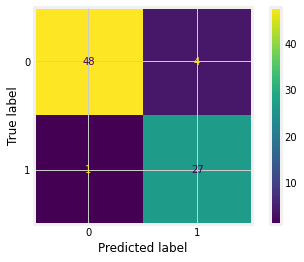

In [36]:
plot_confusion_matrix(model, X_test, y_test,)


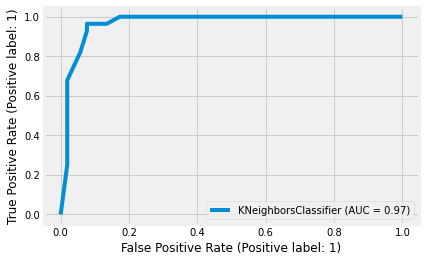

In [37]:
plot_roc_curve(model, X_test,y_test)


Model is preforming at 94% Accuracy